# CodeRefinery pre-workshop survey

As part of the registration to a CodeRefinery workshop, participants are asked to fill in a survey. This notebook contains analysis of the survey results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

Registration time (with personal info removed) kept in `personal` folder, survey results under `survey`.

In [2]:
personal = "personal/"
survey = "survey/"
years = [2016, 2017, 2018]

Collect all data into single dataframe `df_personal`

In [3]:
dfs = []
keys = []
for f in glob.glob(personal+'/20*/*_processed.csv'):
    dfs.append(pd.read_csv(f))
    key = f.replace("/"," ").split()[1:]
    keys.append("-".join(key).replace(".csv",""))

df_personal = pd.concat(dfs, keys=keys, ignore_index=False, sort=False)
df_personal.head()

Unnamed: 0  Gender
2017-umea-oct_processed 0           0    Male
                        1           1  Female
                        2           2    Male
                        3           3    Male
                        4           4    Male

Collect all data into single dataframe `df_survey`

In [4]:
df_survey = pd.DataFrame()
dfs = []
keys = []
for f in glob.glob(survey+'/20*/*.csv'):
    dfs.append(pd.read_csv(f))
    key = f.replace("/"," ").split()[1:]
    keys.append("-".join(key).replace(".csv",""))

df_survey = pd.concat(dfs, keys=keys, ignore_index=False, sort=False)
#df_survey.loc["2016-espoo-dec"]
df_survey.head()

What is the <strong>operating system</strong> that you will use during the course (on your laptop)?  \
2017-linkoeping-nov 0                                              Linux                                                    
                    1                                              Linux                                                    
                    2                                              Linux                                                    
                    3                                           Mac OS X                                                    
                    4                                              Linux                                                    

                      Other  \
2017-linkoeping-nov 0   NaN   
                    1   NaN   
                    2   NaN   
                    3   NaN   
                    4   NaN   

                      Which <strong>version</strong> of operating system are you using? If your operating system is Linux, which <strong>distribution</strong> are you using?  \
2017-linkoeping-nov 0                                          Fedora 25                                                                                                        
                    1                                   Ubuntu 16.04 LTS                                                                                                        
                    2                                         Linux mint                                                                                                        
                    3                                             mac os                                                                                                        
                    4                                               Arch                                                                                                        

                      I don't use version control and I don't know what it is  \
2017-linkoeping-nov 0                                                NaN        
                    1  I don't use version control and I don't know w...        
                    2                                                NaN        
                    3                                                NaN        
                    4                                                NaN        

                      I don't use version control but I know what it is  \
2017-linkoeping-nov 0                                               NaN   
                    1                                               NaN   
                    2                                               NaN   
                    3                                               NaN   
                    4                                               NaN   

                      I use version control, but I don't know which system  \
2017-linkoeping-nov 0                                                NaN     
                    1                                                NaN     
                    2                                                NaN     
                    3                                                NaN     
                    4                                                NaN     

                       Git Mercurial Subversion  CVS          ...           \
2017-linkoeping-nov 0  Git       NaN        NaN  NaN          ...            
                    1  NaN       NaN        NaN  NaN          ...            
                    2  Git       NaN        NaN  NaN          ...            
                    3  Git       NaN        NaN  NaN          ...            
                    4  Git       NaN        NaN  NaN          ...            

                       Software licensing  Documentation     Start Date (UTC)  \
2017-linkoeping-nov 0  Software licensing  Documentation  2017-1

In [5]:
print("number of registrations: ", len(df_personal))
print("number of survey responses: ", len(df_survey))

number of registrations:  407
number of survey responses:  407


In [6]:
len(df_survey.columns)

74

#### Cleaning up

Some questions are split over two columns (one containing NaNs for a given workshop)

In [7]:
from difflib import SequenceMatcher

# function to compare similarity between two strings
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# comparing column names

for n1 in range(len(df_survey.columns)-1):
    for n2 in range(n1+1, len(df_survey.columns)):
        col1 = df_survey.columns[n1]
        col2 = df_survey.columns[n2]
        similarity = similar(col1, col2)
        if similarity > 0.9:
            print("col1 = ", col1)
            print("col2 = ", col2)
            print("similarity = ", similarity)
            print("===========")

col1 =  Are you using <strong>code coverage analysis</strong> in your programming project(s)?
col2 =  Are you using <strong>code coverage analysis</strong> in your programming project(s)?
similarity =  0.9882352941176471
col1 =  Are you using the <strong>Travis or Jenkins</strong> continuous integration service in your programming project(s)?
col2 =  Are you using the <strong>Travis or Jenkins</strong> continuous integration service in your programming project(s)?
similarity =  0.991304347826087
col1 =  Are you using an <strong>integrated development environment (IDE)</strong> for your programming project(s)?
col2 =  Are you using an <strong>integrated development environment (IDE)</strong> for your programming project(s)?
similarity =  0.9906542056074766
col1 =  Please specify your main <strong>academic discipline</strong>.
col2 =  Please specify your main <strong>academic discipline</strong>.
similarity =  0.9838709677419355


These are the duplicate columns:

In [8]:
travis = [df_survey.columns.get_loc(c) for c in df_survey.columns if "Travis or Jenkins" in c]
codecov = [df_survey.columns.get_loc(c) for c in df_survey.columns if "code coverage analysis" in c]
ide = [df_survey.columns.get_loc(c) for c in df_survey.columns if "integrated development environment" in c]
discipline = [df_survey.columns.get_loc(c) for c in df_survey.columns if "academic discipline" in c]

dupl = {"travis":travis, "codecov":codecov, "ide":ide, "discipline":discipline}

Copy from second to first column if value is not NaN

In [9]:
df_survey.iloc[:,dupl["travis"][0]].fillna(df_survey.iloc[:,dupl["travis"][1]], inplace=True)
df_survey.iloc[:,dupl["codecov"][0]].fillna(df_survey.iloc[:,dupl["codecov"][1]], inplace=True)
df_survey.iloc[:,dupl["ide"][0]].fillna(df_survey.iloc[:,dupl["ide"][1]], inplace=True)
df_survey.iloc[:,dupl["discipline"][0]].fillna(df_survey.iloc[:,dupl["discipline"][1]], inplace=True)

Remove reduntant column after copying non-NaN values

In [10]:
rmlist = [x[1] for x in dupl.values()]
df_survey.drop(df_survey.columns[rmlist], axis=1, inplace=True)

### Plot styles

In [11]:
xsize = 8
ysize = 8
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

### Gender

Male                 286
Female               110
Prefer not to say     11
Name: Gender, dtype: int64
total counts =  407


/Users/ktw/anaconda2/envs/juplab/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


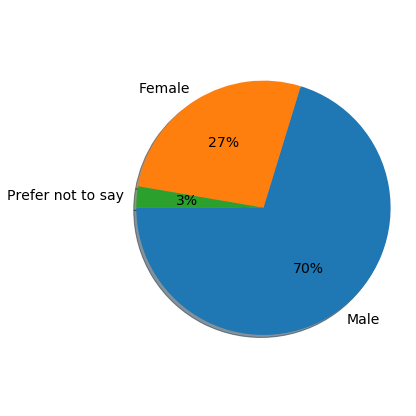

In [12]:
counts = df_personal["Gender"].value_counts()
print(counts)
print("total counts = ", sum(counts.values))
values = counts.values
labels = counts.index
fig1, ax1 = plt.subplots(figsize=(xsize-2,ysize-2))
ax1.pie(counts.values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/gender.png")


### Operating system

Linux       157
Mac OS X    151
Windows      96
Name: What is the <strong>operating system</strong> that you will use during the course (on your laptop)?, dtype: int64
total counts =  404


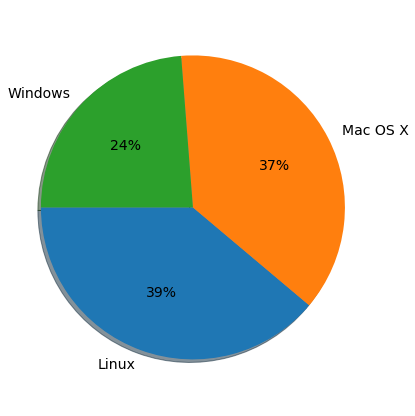

In [13]:
os = 'What is the <strong>operating system</strong> that you will use during the course (on your laptop)?'
counts = df_survey[os].value_counts()
print(counts)
print("total counts = ", sum(counts.values))
values = counts.values
labels = counts.index
fig1, ax1 = plt.subplots(figsize=(xsize-2,ysize-2))
ax1.pie(counts.values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/operatingsystems.png")


### Programming experience

Many small codes or \ncontributed to large projects    209
Written own \nsimple programs                          136
Basic understanding \nand experience                    36
I am an expert                                          24
No programming experience                                2
Name: How would you describe your <strong>programming experience</strong>?, dtype: int64
total counts =  407


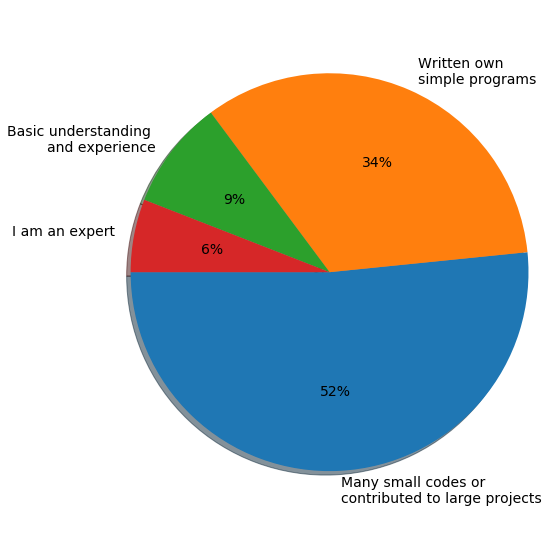

In [14]:
plt.rc('font', **font)
experience='How would you describe your <strong>programming experience</strong>?'
counts = df_survey[experience].value_counts()

# renaming for less cluttering
counts.rename({"I have written many small codes and/or contributed to large complex software": 
                   "Many small codes or \ncontributed to large projects"}, inplace=True)
counts.rename({"I have written my own simple programs": 
                   "Written own \nsimple programs"}, inplace=True)
counts.rename({"Basic understanding and experience, I have looked through code and made minor adjustments": 
                   "Basic understanding \nand experience"}, inplace=True)
counts.rename({"I have no programming experience":
                   "No programming experience"}, inplace=True)
print(counts)
print("total counts = ", sum(counts.values))
counts.drop(labels="No programming experience", inplace=True)

values = counts.values
labels = counts.index
fig1, ax1 = plt.subplots(figsize=(xsize,ysize))
ax1.pie(counts.values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/programming-experience.png")



### Experience with version control

In [15]:
version_control = ["I don't use version control and I don't know what it is", 
                   "I don't use version control but I know what it is", 
                   "I use version control, but I don't know which system", 
                   "Git", "Mercurial", "Subversion", "CVS", 
                   "Perforce", "Bazaar"]

Don't use VCS, \ndon't know what it is     56
Don't use VCS, \nbut know what it is      105
Use VCS, but don't know which               2
Git                                       253
Mercurial                                  11
Subversion                                 33
CVS                                        13
Perforce                                    2
Bazaar                                      0
dtype: int64
total counts =  475


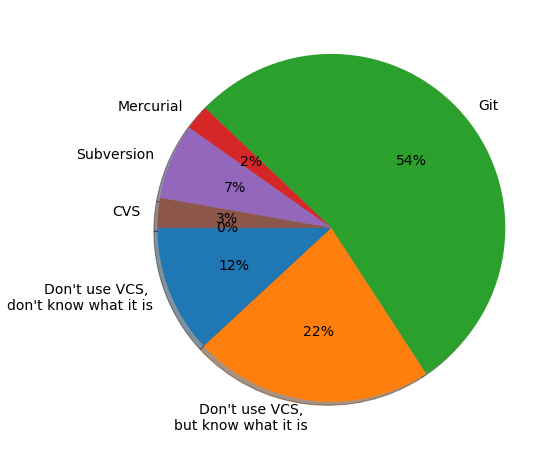

In [16]:
df_versioncontrol = df_survey[version_control] 
data = df_versioncontrol.notna().sum()

# renaming for less cluttering
data.rename({"I don't use version control and I don't know what it is": 
                   "Don't use VCS, \ndon't know what it is"}, inplace=True)
data.rename({"I don't use version control but I know what it is": 
                   "Don't use VCS, \nbut know what it is"}, inplace=True)
data.rename({"I use version control, but I don't know which system": 
                   "Use VCS, but don't know which"}, inplace=True)

print(data)
print("total counts = ", sum(data.values))
# dropping answers below 1%
data.drop(labels="Use VCS, but don't know which", inplace=True)
data.drop(labels="Perforce", inplace=True)

plt.figure(figsize=(xsize,ysize))
data.plot.pie(autopct='%1.0f%%',
        shadow=True, startangle=180)
plt.ylabel("")
plt.savefig("img/version-control.png")
plt.show()


### Which language do you write in?

In [17]:
languages = sorted(['C', 'C++', 'Fortran 77', 'Fortran 90+', 'Matlab',
            'Python', 'Haskell', 'R', 'Perl', 'Julia', 'Go'])

C               78
C++            105
Fortran 77      42
Fortran 90+     84
Go               3
Haskell          4
Julia           10
Matlab         150
Perl            31
Python         319
R              126
dtype: int64
total counts =  952


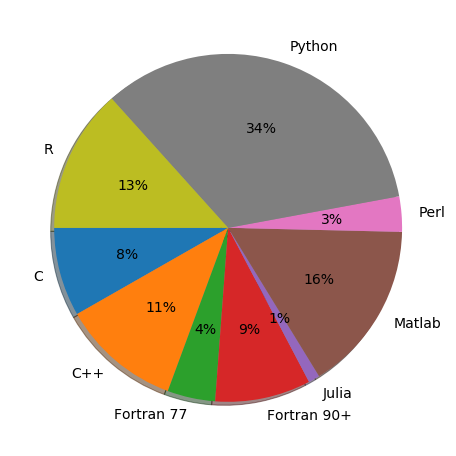

In [18]:
df_languages = df_survey[languages] 
data = df_languages.notna().sum()
print(data)
print("total counts = ", sum(data.values))

# dropping answers below 1%
data.drop(labels="Haskell", inplace=True)
data.drop(labels="Go", inplace=True)

plt.figure(figsize=(xsize,ysize))
data.plot.pie(autopct='%1.0f%%',
        shadow=True, startangle=180)
plt.ylabel("")
plt.savefig("img/languages.png")
plt.show()


### Documentation

In [19]:
doc = sorted(["No documentation", "Comments in the source code", 
       "Doxygen", "Wiki", "RST/Sphinx", "Read the Docs", 
       "MkDocs", "PDF", "HMTL", "Markdown", "README files"])

Comments in the source code    329
Doxygen                         22
HMTL                            10
Markdown                        73
MkDocs                           1
No documentation                36
PDF                             38
README files                   156
RST/Sphinx                      16
Read the Docs                   24
Wiki                            29
dtype: int64
total counts =  734


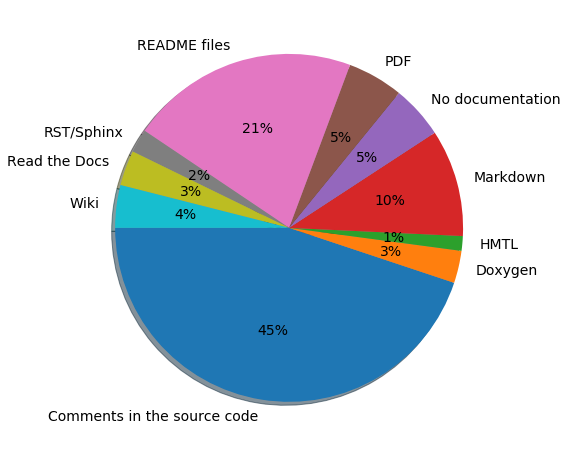

In [20]:
df_doc = df_survey[doc] 
data = df_doc.notna().sum()
print(data)
print("total counts = ", sum(data.values))

# dropping answers below 1%
data.drop(labels="MkDocs", inplace=True)

plt.figure(figsize=(xsize,ysize))
data.plot.pie(autopct='%1.0f%%', shadow=True, startangle=180)
plt.ylabel("")
plt.savefig("img/documentation.png")
plt.show()

### Scientific disciplines

Computer and Information Sciences                                          93
Physical Sciences                                                          90
Biological Sciences                                                        51
Chemical Sciences                                                          33
Earth and Related Environmental Sciences                                   27
Mathematics                                                                15
Electrical Engineering, Electronic Engineering, Information Engineering    13
Mechanical Engineering                                                     11
Medical Biotechnology                                                       9
Health Sciences                                                             7
Environmental Engineering                                                   6
Other                                                                      20
Basic Medicine                                                  

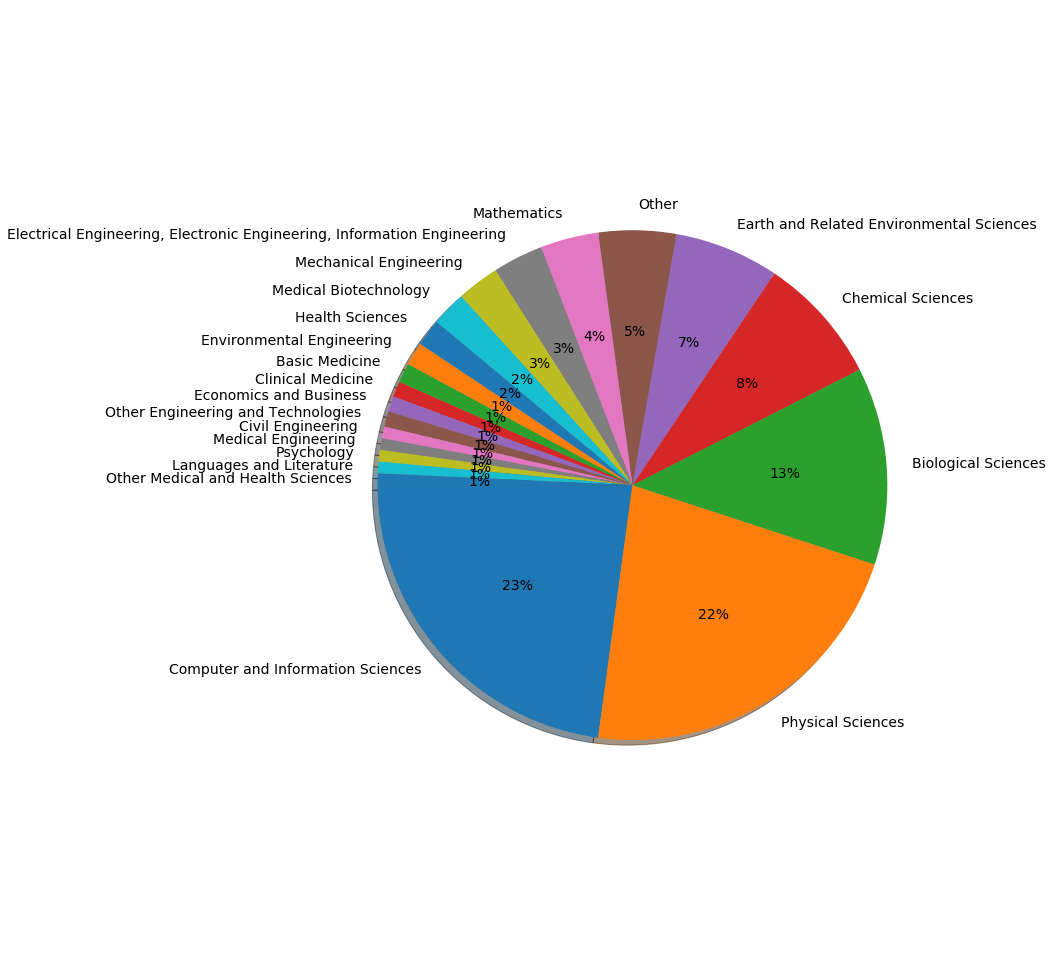

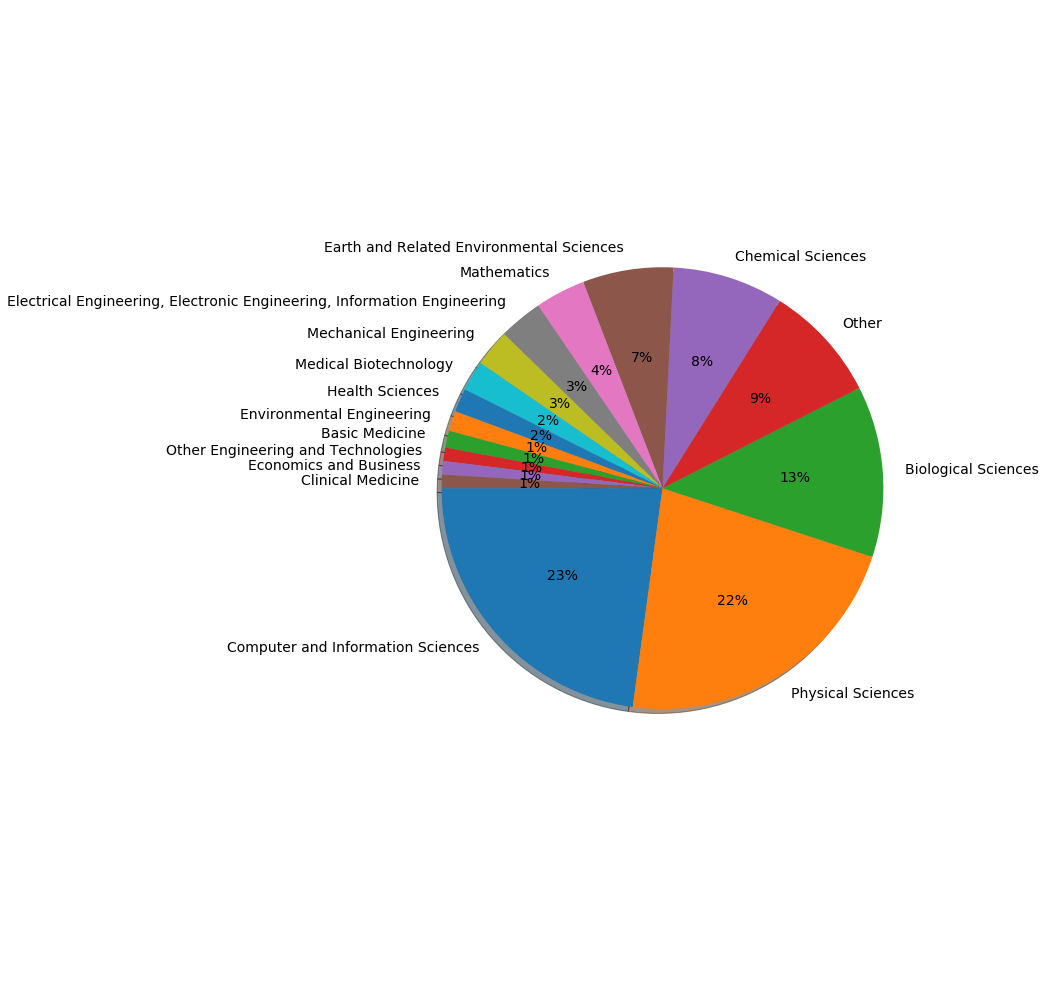

In [21]:
plt.rc('font', **font)
discipline='Please specify your main\xa0<strong>academic discipline</strong>.'
counts = df_survey[discipline].value_counts()

#for i in counts.index:
#    if counts[i] < 3.0:
#        counts.drop(labels=i, inplace=True)
#counts["Other"] = 0.0
counts_filter1 = counts.copy(deep=True)
counts_filter2 = counts.copy(deep=True)
for i in counts.index:
    if counts[i] < 3.0:
        counts_filter1["Other"] += counts[i]
        counts_filter1.drop(labels=i, inplace=True)
    if counts[i] < 4.0:
        counts_filter2["Other"] += counts[i]
        counts_filter2.drop(labels=i, inplace=True)

        
print(counts_filter1)
print("total counts = ", sum(counts_filter1.values))

counts_filter1.sort_values(ascending=False, inplace=True)
counts_filter2.sort_values(ascending=False, inplace=True)

values = counts_filter1.values
labels = counts_filter1.index
fig1, ax1 = plt.subplots(figsize=(14,14))
ax1.pie(values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/scientific-discipline-1.png")

values = counts_filter2.values
labels = counts_filter2.index
fig1, ax1 = plt.subplots(figsize=(14,14))
ax1.pie(values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/scientific-discipline-2.png")

